# Model Evaluation

## [Homework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2022/04-evaluation/homework.md)

### [Dataset link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv)

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2023-09-20 08:25:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.04s   

2023-09-20 08:25:33 (1.77 MB/s) - ‘AER_credit_card_data.csv’ saved [73250/73250]



In [85]:
import pandas as pd
data_path = 'AER_credit_card_data.csv'
df_orig = pd.read_csv(data_path)

In [86]:
df_orig.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [87]:
df = df_orig.copy()
df.columns = df.columns.str.lower()
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


## Preparation

* Create the target variable by mapping `yes` to 1 and `no` to 0.
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`.

In [88]:
df.card.unique()

array(['yes', 'no'], dtype=object)

In [89]:
card_values = {
    "yes": 1,
    "no": 0
}

df["card"] = df.card.map(card_values)
df.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,1,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,1,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,1,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,1,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,1,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [90]:
df.card

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: card, Length: 1319, dtype: int64

In [91]:
# Spliting the dataset

from sklearn.model_selection import train_test_split

In [92]:
df_train_full, df_test = train_test_split(df, test_size=.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=.25, random_state=1)

df_train = df_train.reset_index(drop=False)
df_val = df_val.reset_index(drop=False)
df_test = df_test.reset_index(drop=False)

y_train = df_train.card
y_val = df_val.card
y_test = df_test.card

del df_train['card']
del df_val['card']
del df_test['card']


In [93]:
y_train

0      0
1      0
2      1
3      1
4      1
      ..
786    1
787    0
788    1
789    1
790    0
Name: card, Length: 791, dtype: int64

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the `card` variable.
* Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* [ ] reports
* [ ] dependents
* [ ] active
* [x] share


In [94]:
from sklearn.metrics import roc_auc_score

In [95]:
df_train.head()

,index,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1105,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,431,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,407,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1217,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,1133,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


In [96]:
num_features = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']

df_train[num_features]

,reports,age,income,share,expenditure,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,2,29,0,4
...,...,...,...,...,...,...,...,...,...
786,0,53.00000,2.4500,0.017718,35.67500,0,3,1,11
787,2,30.58333,2.5000,0.000480,0.00000,0,12,1,18
788,0,24.75000,1.8750,0.080708,126.02250,1,14,0,1
789,1,56.91667,3.4838,0.062895,182.09580,0,540,1,7


In [100]:
features = ["reports", "dependents", "active", "share"]

In [102]:
for feature in features:
    acc = roc_auc_score(y_train, df_train[feature])
    if acc < 0.5:
        acc = roc_auc_score(y_train, -df_train[feature])
    print(f"{feature} : {acc}")

reports : 0.7166629860689376
dependents : 0.5327757227773791
active : 0.6043173411362006
share : 0.989183643423692



## Training the model

From now on, use these columns only:

`
["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
`

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

`
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
`

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

* [ ] 0.615
* [ ] 0.515
* [ ] 0.715
* [x] 0.995

In [106]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model
    

In [107]:
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
dv, model = train(df_train[features], y_train, )

In [217]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [126]:
y_train_pred = predict(df_train[features], dv, model)

In [127]:
y_val_pred = predict(df_val[features], dv, model)
y_val_pred

array([1.00000000e+00, 5.80231603e-02, 1.00000000e+00, 1.95534636e-02,
       1.00000000e+00, 1.00000000e+00, 7.01198840e-02, 1.00000000e+00,
       1.00000000e+00, 9.95731859e-01, 1.38364925e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.38123529e-02,
       1.00000000e+00, 1.00000000e+00, 2.32127984e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.85316595e-04,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.17336210e-08, 4.51764765e-04, 1.00000000e+00, 4.44723906e-03,
       1.65674798e-05, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 4.81355803e-04, 1.00000000e+00, 1.00000000e+00,
       3.66674687e-03, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.71474291e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.42068351e-04,
      

In [128]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_val_pred)

0.995171242063847

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them


At which threshold precision and recall curves intersect?

* [ ] 0.1
* [x] 0.3
* [ ] 0.6
* [ ] 0.8

from sklearn.metrics import roc_auc_score, roc_curve

In [147]:
dicts_val = df_val.to_dict(orient='records')

X_val = dv.transform(dicts_val)

In [149]:
#@ INSPECTING THE ROC AUC SCORE:
y_val_pred_bin = model.predict(X_val)


In [156]:
y_val_pred.shape, y_val_pred_bin.shape, y_val.shape

((264,), (264,), (264,))

In [158]:
y_val[:5]

0    1
1    0
2    1
3    0
4    1
Name: card, dtype: int64

In [159]:
y_val_pred_bin[:5]

array([1, 0, 1, 0, 1])

In [162]:
type(y_val), type(y_val_pred_bin)

(pandas.core.series.Series, numpy.ndarray)

In [163]:
# roc_auc_score(y_val_pred, y_val_pred_bin)
roc_auc_score(y_val, y_val_pred_bin)

0.9739783600107306

In [164]:
# Inspecting the ROC curve
import matplotlib.pyplot as plt

In [165]:
plt.figure(figsize=(5, 5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

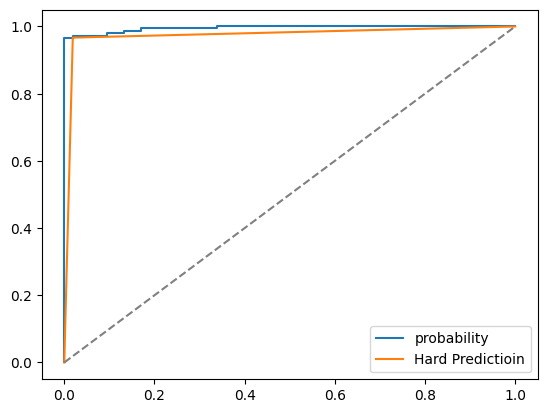

In [174]:
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
plt.plot(fpr, tpr, label='probability')

fpr, tpr, _ = roc_curve(y_val, y_val_pred_bin)
plt.plot(fpr, tpr, label='Hard Predictioin')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.legend()

plt.show()

In [176]:
import numpy as np

In [191]:
# Creating confusion matrix

def confusion_matrix_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    return df_scores


        

In [192]:
# Implementation of function
df_scores = confusion_matrix_dataframe(y_val, y_val_pred)
df_scores[::10]

,thresholds,tp,fp,fn,tn
0,0.0,211,53,0,0
10,0.1,210,17,1,36
20,0.2,207,5,4,48
30,0.3,205,5,6,48
40,0.4,205,1,6,52
50,0.5,204,1,7,52
60,0.6,204,1,7,52
70,0.7,204,1,7,52
80,0.8,204,1,7,52
90,0.9,204,0,7,53


In [193]:
# Adding the columns Precision and Recall

df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)


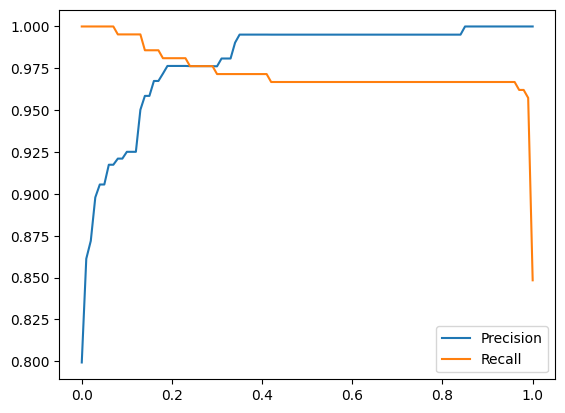

In [195]:
# Inspecting the curves
plt.plot(df_scores.thresholds, df_scores.p, label='Precision')
plt.plot(df_scores.thresholds, df_scores.r, label='Recall')

plt.legend()
plt.show()

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing $F_1$:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

* [ ] 0.1
* [x] 0.4
* [ ] 0.6
* [ ] 0.7

In [202]:
# Getting F1 scores
df_scores['f1'] = 2 * (df_scores.p * df_scores.r) / (df_scores.p + df_scores.r)

In [203]:
df_scores['f1'][::10]

0      0.888421
10     0.958904
20     0.978723
30     0.973872
40     0.983213
50     0.980769
60     0.980769
70     0.980769
80     0.980769
90     0.983133
100    0.917949
Name: f1, dtype: float64

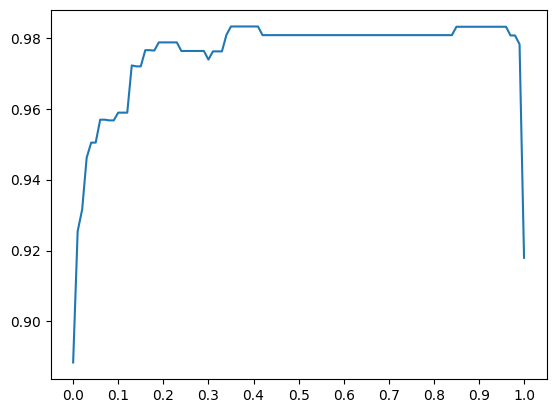

In [207]:
# Inspecting F1 Score

plt.plot(df_scores.thresholds, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

## Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


How large is standard devidation of the AUC scores across different folds?

* [x] 0.003
* [ ] 0.014
* [ ] 0.09
* [ ] 0.24

In [256]:
# train and predict functions areleady defined above


In [257]:
# Initializing KFold cross validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [259]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.card
    y_val = df_val.card
    
    del df_train['card']
    del df_val['card']
    
    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)
    
#     print(y_val[::10])
#     print(y_pred[::10])  
    
    auc = roc_auc_score(y_val, y_pred)

    scores.append(auc)
    
scores_mean = np.mean(scores)
scores_std = np.std(scores)
print('%.3f += %.3f', scores_mean, scores_std)
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))


%.3f += %.3f 0.9964498276814243 0.0027434713804377724
0.996 +- 0.003


In [260]:
scores

[0.9941860465116279,
 0.9941176470588236,
 0.9943346508563901,
 0.9996107939802803,
 1.0]

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)


Which C leads to the best mean score?

* [ ] 0.01
* [ ] 0.1
* [x] 1
* [ ] 10

In [265]:
final_score = []

for c_value in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card
        y_val = df_val.card

        del df_train['card']
        del df_val['card']

        dv, model = train(df_train, y_train, C=c_value)
        y_pred = predict(df_val, dv, model)

    #     print(y_val[::10])
    #     print(y_pred[::10])  

        auc = roc_auc_score(y_val, y_pred)

        scores.append(auc)
    
    final_score.append((c_value, np.mean(scores)))

print(final_score)



[(0.01, 0.9918810292344007), (0.1, 0.9950557137157224), (1, 0.9964498276814243), (10, 0.9963886109436032)]
